# Задача

1. Скачайте временной ряд со значениями от IEX (Investors Exchange - Биржа Инвесторов) с помощью pandas_datareader. Берем значения close.
2. Постройте предсказания для каждого следующего значения, используя:

  2.1. Простое среднее по предыдущим N элементам (возьмите N = 10)
  
  2.2. Взвешенное среднее по предыдущим N элементам (веса нужно просто задать вручную, от большего к меньшему, сумма весов == 1)
  
  2.3. Экспоненциальное среднее.
  
  2.4. Двойное экспоненциальное среднее.
  
3. Для всех алгоритмов из п.2 (п.2.1 - п.2.4) Посчитайте расхождения предсказаний для разных алгоритмов (средняя квадратичная ошибка MSE). Какой из подходов дает наименьшее значение MSE? Почему?

In [3]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 1, 27)
f = web.DataReader('F', 'iex', start, end, api_key='pk_bff04174872241fc95889d80baa8dca3')

In [10]:
f.tail()

,open,high,low,close,volume
date,,,,,
2019-01-18,8.39,8.60,8.33,8.58,51127860
2019-01-22,8.54,8.61,8.46,8.50,47182620
2019-01-23,8.54,8.54,8.28,8.34,45196860
2019-01-24,8.32,8.68,8.22,8.60,79516367
2019-01-25,8.74,8.96,8.73,8.86,53130148


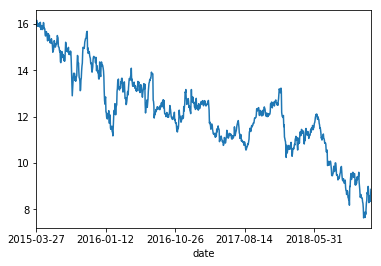

In [6]:
f['close'].plot()

In [8]:
import numpy as np

In [11]:
def moving_average(series, n):
    return np.mean(series[-n:])


moving_average(f['close'], 10)

8.622727272727273

In [24]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n] * weights[n]
    return result


weighted_average(f['close'], weights=[0.25, 0.225, 0.175, 0.15, 0.1, 0.07, 0.03])

8.7186

In [29]:
def exponential_smoothing(series, alpha):
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result

exponential_smoothing(f['close'], 0.5)[-1]

8.686343412892642